In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Datasets/hpi_master.csv')

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Sample data (replace with your actual model predictions and true labels)
y_true = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
y_pred = np.array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0])

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.6000
Precision: 0.6000
Recall: 0.6000
F1 Score: 0.6000


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
display(df.head())

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,index_nsa,index_sa,year,month,quarter,index_sa_lag_1,index_sa_lag_3,index_sa_lag_6,index_sa_lag_12,index_sa_yoy_growth,index_sa_moving_average_3,index_sa_moving_average_6
date,,,,,,,,,,,,,,,,,,
1975-03-01,traditional,all-transactions,quarterly,State,Tennessee,TN,67.79,NaN,1975,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-03-01,traditional,all-transactions,quarterly,State,Idaho,ID,67.74,NaN,1975,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-03-01,traditional,all-transactions,quarterly,State,Florida,FL,66.05,NaN,1975,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-03-01,traditional,all-transactions,quarterly,State,Delaware,DE,76.87,NaN,1975,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-03-01,traditional,all-transactions,quarterly,USA or Census Division,East South Central Division,DV_ESC,68.65,NaN,1975,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_filtered = df[(df['hpi_type'] == 'traditional') &
                 (df['hpi_flavor'] == 'purchase-only') &
                 (df['frequency'] == 'monthly') &
                 (df['place_name'] == 'United States')]
display(df_filtered.head())

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,index_nsa,index_sa,year,month,quarter,index_sa_lag_1,index_sa_lag_3,index_sa_lag_6,index_sa_lag_12,index_sa_yoy_growth,index_sa_moving_average_3,index_sa_moving_average_6
date,,,,,,,,,,,,,,,,,,
1991-01-01,traditional,purchase-only,monthly,USA or Census Division,United States,USA,100.00,100.00,1991,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-01,traditional,purchase-only,monthly,USA or Census Division,United States,USA,100.36,100.39,1991,2,1,100.00,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-01,traditional,purchase-only,monthly,USA or Census Division,United States,USA,100.67,100.46,1991,3,1,100.39,NaN,NaN,NaN,NaN,100.283333,NaN
1991-04-01,traditional,purchase-only,monthly,USA or Census Division,United States,USA,100.66,100.29,1991,4,2,100.46,100.00,NaN,NaN,NaN,100.380000,NaN
1991-05-01,traditional,purchase-only,monthly,USA or Census Division,United States,USA,100.82,100.35,1991,5,2,100.29,100.39,NaN,NaN,NaN,100.366667,NaN


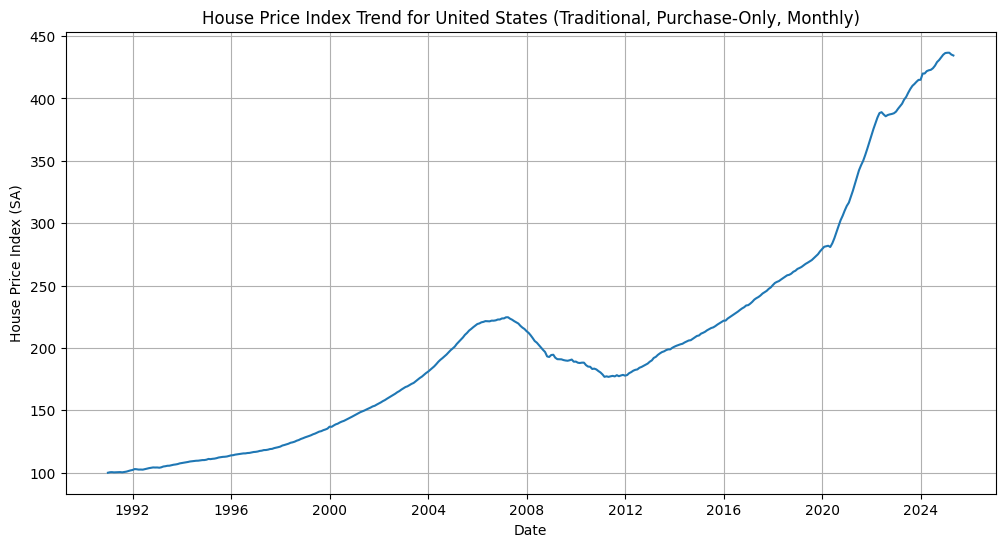

In [ ]:
df_processed = df_filtered[['index_sa']]

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_processed.index, df_processed['index_sa'])
plt.title('House Price Index Trend for United States (Traditional, Purchase-Only, Monthly)')
plt.xlabel('Date')
plt.ylabel('House Price Index (SA)')
plt.grid(True)
plt.show()